# ***Regiones admisibles para los procesos MA(1) y MA(2)***


## **Considere un proceso MA(1):**

$$
(1 - \theta B) q_t = W_t \quad ; \quad q_t \sim WN(0, \sigma^2)
$$

**Recuerde:**  
Este proceso es estacionario, pero **no siempre es invertible**.


**Condición de invertibilidad:**

$$
|\theta| < 1
$$

---

### **A partir de esta condición identificamos dos regiones admisibles**

---



**Región Admisible #1:**

$$
0 < \theta < 1
$$




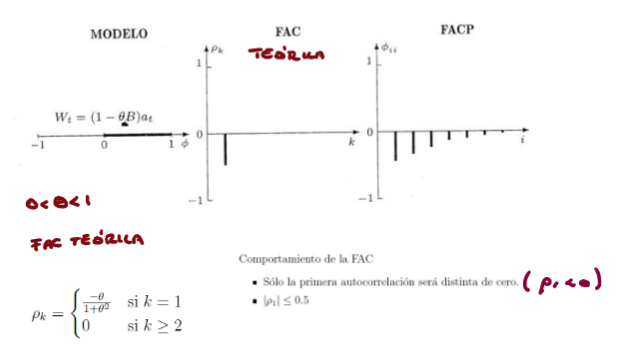


**Modelo**

$$
W_t = (1 - \theta B) a_t
$$

Se muestra la región para $0 < \theta < 1$ en la línea del eje horizontal de la figura.


**FAC teórica**

- Comportamiento de la **Función de Autocorrelación (FAC)**:

$$
\rho_k =
\begin{cases}
\displaystyle\frac{-\theta}{1 + \theta^2} & \text{si } k = 1 \\
0 & \text{si } k \geq 2
\end{cases}
$$

- Solo la **primera autocorrelación** es distinta de cero.
- Además, se cumple:

$$
|\rho_1| \leq 0.5
$$

- En esta región, la autocorrelación es **negativa**: $\rho_1 < 0$



**FACP teórica**

>La **Función de Autocorrelación Parcial (FACP)** decae rápidamente y es casi nula después de los primeros lags.



**Ejemplo:**  
(*No se especificó un ejemplo numérico concreto en esta imagen.*)



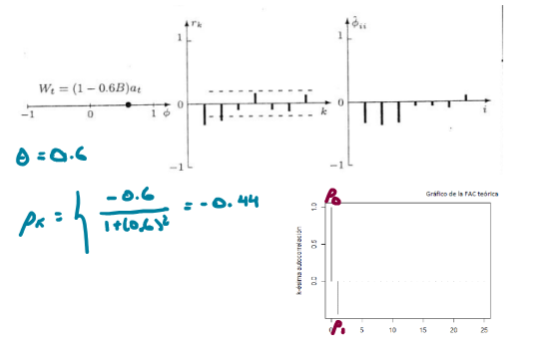

---

**Región Admisible #2**

Para esta región del modelo MA(1) se cumple:

- $-1 < \theta < 0$



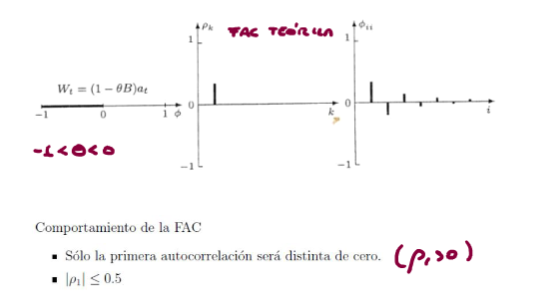



**Modelo**

$$
W_t = (1 - \theta B) a_t
$$

Ejemplo específico:

- $\theta = -0.4$

**FAC teórica:**

Se utiliza la fórmula:

$$
\rho_k =
\begin{cases}
\displaystyle\frac{-\theta}{1 + \theta^2} & \text{si } k = 1 \\
0 & \text{si } k \geq 2
\end{cases}
$$

Sustituyendo:

$$
\rho_1 = \frac{-(-0.4)}{1 + (-0.4)^2} = \frac{0.4}{1 + 0.16} = \frac{0.4}{1.16} \approx 0.3448
$$

Entonces:

- $\rho_1 \approx 0.34 > 0$
- $\rho_k = 0$ para $k \geq 2$


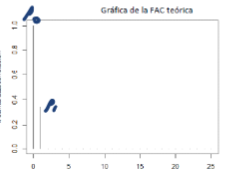

---

## **Considere un proceso MA(2):**

$$
(1 - \theta_1 B - \theta_2 B^2) \alpha_t = W_t \quad ; \quad \alpha_t \sim WN(0, \sigma^2)
$$


**Condiciones para probar invertibilidad:**

1. $|\theta_2| < 1$

2. $\theta_2 + \theta_1 < 1$

3. $\theta_2 - \theta_1 < 1$

---

### **De aquí surgen las siguientes regiones admisibles**

---


**Región Admisible #1: Discriminante > 0 y θ₁ < 0 **

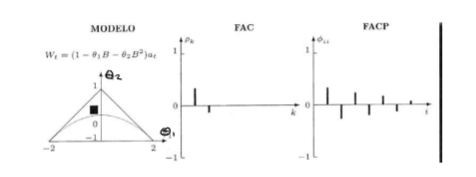

**Modelo MA(2):**

$$
W_t = (1 - \theta_1 B - \theta_2 B^2) a_t
$$

En el plano $(\theta_1, \theta_2)$, esta región está dentro del triángulo de invertibilidad donde se cumple:

- $\theta_1^2 + 4\theta_2 > 0$
- $\theta_1 < 0$


**FAC teórica**

Comportamiento de la función de autocorrelación:

$$
\rho_k =
\begin{cases}
\displaystyle\frac{-\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
\displaystyle\frac{-\theta_2 + \theta_1^2 \theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

**FACP:**

- La función de autocorrelación parcial muestra valores distintos de cero en los primeros dos lags, truncándose a partir del tercero.

**Comportamiento:**

> Solo $\rho_1$ y $\rho_2$ son autocorrelaciones distintas de cero.
> A partir de $\rho_3$, todas las autocorrelaciones serán igual a cero.





**Ejemplo: Proceso MA(2)**

Dado el proceso:

$$
W_t = (1 + 0.5B - 0.2B^2)a_t
$$

**Parámetros:**

- $\theta_1 = -0.5$
- $\theta_2 = 0.2$



**Verificación del discriminante:**

$$
\theta_1^2 + 4\theta_2 = (-0.5)^2 + 4(0.2) = 0.25 + 0.8 = 1.05 > 0
$$


**Se cumplen las 3 condiciones de invertibilidad:**

1. $|\theta_2| = 0.2 < 1$

2. $\theta_1 + \theta_2 = -0.5 + 0.2 = -0.3 < 1$

3. $\theta_2 - \theta_1 = 0.2 - (-0.5) = 0.7 < 1$



**FAC teórica:**

La fórmula general para el proceso MA(2) es:

$$
\rho_k =
\begin{cases}
\displaystyle\frac{-\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\\\
\displaystyle\frac{-\theta_2 + \theta_1^2 \theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\\\
0 & \text{si } k \geq 3
\end{cases}
$$

**Cálculo numérico:**

1. Para $k = 1$:

$$
\rho_1 = \frac{-(-0.5)(1 - 0.2)}{1 + (-0.5)^2 + (0.2)^2}
= \frac{(0.5)(0.8)}{1 + 0.25 + 0.04}
= \frac{0.4}{1.29} \approx 0.31
$$

2. Para $k = 2$:

$$
\rho_2 = \frac{-0.2 + (-0.5)^2(0.2)}{1.29}
= \frac{-0.2 + 0.05}{1.29}
= \frac{-0.15}{1.29} \approx -0.116
$$

3. Para $k \geq 3$:

$$
\rho_k = 0
$$




**Gráfico de la FAC teórica:**

Visualmente se observan solo $\rho_1$ y $\rho_2$ distintos de cero. El resto son cero.
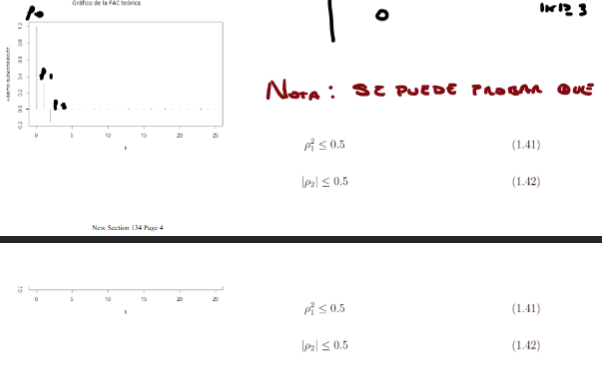

**Nota:**

Se puede probar que:

- $|\rho_1| \leq 0.5$
- $|\rho_2| \leq 0.5$

---


**Región Admisible #2: Discriminante > 0 y $\theta_{1} > 0$**

Consideramos el modelo:

$$
W_t = (1 - \theta_1 B - \theta_2 B^2)\alpha_t
$$



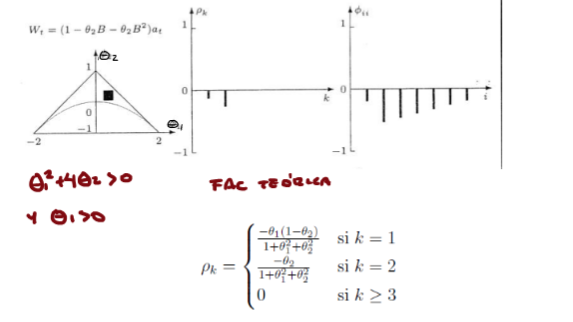



**Condiciones:**

- $\theta_1^2 + 4\theta_2 > 0$
- $\theta_2 > 0$


**FAC teórica:**

$$
\rho_k =
\begin{cases}
-\frac{\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
-\frac{\theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

**Comportamiento:**
> Solo $\rho_1$ y $\rho_2$ son autocorrelaciones distintas de cero.

**Ejemplo**

Modelo:

$$
W_t = (1 - 0.3B - 0.4B^2)\alpha_t
$$

Parámetros:

- $\theta_1 = 0.3$
- $\theta_2 = 0.4$

Comprobación:

$$
\theta_1^2 + 4\theta_2 = (0.3)^2 + 4(0.4) = 0.09 + 1.6 = 1.69 > 0
$$



**Condiciones de invertibilidad:**

- $|\theta_2| = |0.4| < 1$
- $\theta_2 + \theta_1 = 0.7 < 1$
- $\theta_2 - \theta_1 = 0.1 < 1$

Cumple con las condiciones de invertibilidad



- $\theta_1 = 0.3$
- $\theta_2 = 0.4$

**Fórmulas:**

$$
\rho_k =
\begin{cases}
-\dfrac{\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
-\dfrac{\theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$


 Sustituyendo los valores

- $\rho_1 = -\dfrac{0.3 (1 - 0.4)}{1 + 0.3^2 + 0.4^2} = -\dfrac{0.3 (0.6)}{1 + 0.09 + 0.16} = -\dfrac{0.18}{1.25} = -0.144$

- $\rho_2 = -\dfrac{0.4}{1.25} = -0.32$

- $\rho_k = 0$ para $k \geq 3$



$$
\rho_k =
\begin{cases}
-0.14 & \text{si } k = 1 \\
-0.32 & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

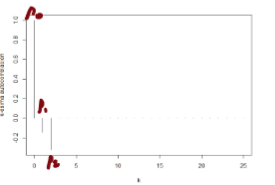

---



**Región Admisible #3: Discriminante < 0 ; $\theta_{1} < 0$**

**Modelo:**

$$
W_t = (1 - \theta_1 B - \theta_2 B^2) \alpha_t
$$



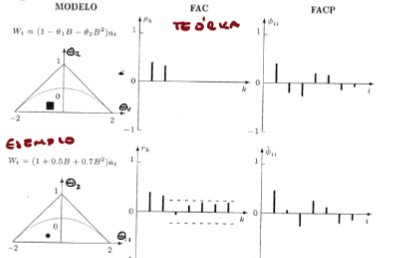


**Ejemplo:**

$$
W_t = (1 + 0.5B + 0.7B^2) \alpha_t
$$

**Parámetros:**

- $\theta_1 = -0.5$
- $\theta_2 = -0.7$

**Discriminante:**

$$
\theta_1^2 + 4\theta_2 = (-0.5)^2 + 4(-0.7) = 0.25 - 2.8 = -2.55 < 0
$$

**Se cumplen las condiciones de invertibilidad:**

- $|\theta_2| = 0.7 < 1$
- $\theta_1 + \theta_2 = -1.2 < 1$
- $\theta_2 - \theta_1 = -0.2 < 1$

**FAC teórica:**

$$
\rho_k =
\begin{cases}
-\dfrac{\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
-\dfrac{\theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

**Sustituyendo:**

- $\rho_1 = -\dfrac{-0.5 (1 - (-0.7))}{1 + (-0.5)^2 + (-0.7)^2} = \dfrac{0.5 \cdot 1.7}{1 + 0.25 + 0.49} = \dfrac{0.85}{1.74} \approx 0.488$
- $\rho_2 = -\dfrac{-0.7}{1.74} = 0.402$
- $\rho_k = 0$ para $k \geq 3$

**Resultado final:**

$$
\rho_k =
\begin{cases}
0.48 & \text{si } k = 1 \\
0.40 & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$


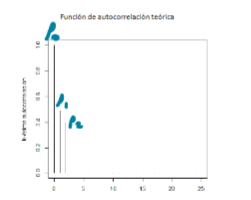

---

**Región Admisible #3: Discriminante < 0 ; $\theta_{1} < 0$**

**Modelo:**

$$
W_t = (1 - \theta_1 B - \theta_2 B^2) \alpha_t
$$


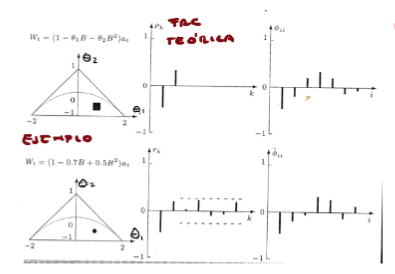


**Ejemplo:**

$$
W_t = (1 + 0.5B + 0.7B^2) \alpha_t
$$

**Parámetros:**

- $\theta_1 = 0.7$
- $\theta_2 = -0.5$

**Discriminante:**

$$
\theta_1^2 + 4\theta_2 = (0.7)^2 + 4(-0.5) = 0.49 - 2 = -1.51 < 0
$$

**Se cumplen las condiciones de invertibilidad:**

- $|\theta_1| = 0.7 < 1$
- $\theta_1 + \theta_2 = 0.2 < 1$
- $\theta_2 - \theta_1 = -0.12< 1$

**FAC teórica:**

$$
\rho_k =
\begin{cases}
-\dfrac{\theta_1 (1 - \theta_2)}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 1 \\
-\dfrac{\theta_2}{1 + \theta_1^2 + \theta_2^2} & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$

**Sustituyendo:**

- $\rho_1 = -\dfrac{-0.7 (1 - (-0.5))}{1 + (0.7)^2 + (-0.5)^2} =\dfrac{-0.7 (1.5)}{1 + (0.7)^2 + (-0.5)^2}  = -0.603 $
- $\rho_2 = -\dfrac{-0.5}{1.74} = 0.28$
- $\rho_k = 0$ para $k \geq 3$

**Resultado final:**

$$
\rho_k =
\begin{cases}
-0.603 & \text{si } k = 1 \\
0.28 & \text{si } k = 2 \\
0 & \text{si } k \geq 3
\end{cases}
$$
